# **LAB 2 - PART 1 PCA**
- Data Exploration
- PCA
- Simple Linear Regression


### Import tools
as listed in Lab direction sheet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

## Data Exploration and Transformation
Read the Data_example.csv files from https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- parameter name `header`.
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|   | 0 | 1    | 2   | 3   | 4    | 5   | 6   | 7   | 8    | 9   | 10  | 11  | 12  | 13  |
|---|---|------|-----|-----|------|-----|-----|-----|------|-----|----|----|----|----|
| 0 | 1 | 14.23 | 1.71 | 2.43 | 15.6 | 127 | 2.80 | 3.06 | 0.28 | 2.29 | 5.64 | 1.04 | 3.92 | 1065 |
| 1 | 1 | 13.20 | 1.78 | 2.14 | 11.2 | 100 | 2.65 | 2.76 | 0.26 | 1.28 | 4.38 | 1.05 | 3.40 | 1050 |
| 2 | 1 | 13.16 | 2.36 | 2.67 | 18.6 | 101 | 2.80 | 3.24 | 0.30 | 2.81 | 5.68 | 1.03 | 3.17 | 1185 |
| 3 | 1 | 14.37 | 1.95 | 2.50 | 16.8 | 113 | 3.85 | 3.49 | 0.24 | 2.18 | 7.80 | 0.86 | 3.45 | 1480 |
| 4 | 1 | 13.24 | 2.59 | 2.87 | 21.0 | 118 | 2.80 | 2.69 | 0.39 | 1.82 | 4.32 | 1.04 | 2.93 | 735 |


</details>

In [2]:
### START CODE HERE ###
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header = None)
### END CODE HERE ###
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


Set the column names according to the order specified in this list: `['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']`

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `df.column`
</details>

<br>
<details>
<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| Class label | Alcohol | Malic acid | Ash | Alcalinity of ash | Magnesium | Total phenols | Flavanoids | Nonflavanoid phenols | Proanthocyanins | Color intensity | Hue | OD280/OD315 of diluted wines | Proline |
|-------------|---------|------------|-----|---------------------|-----------|---------------|------------|----------------------|------------------|------------------|-----|------------------------------|---------|
|      1      |  14.23  |    1.71    | 2.43 |        15.6         |    127    |      2.80     |    3.06    |         0.28         |       2.29       |       5.64       | 1.04|            3.92              |  1065   |
|      1      |  13.20  |    1.78    | 2.14 |        11.2         |    100    |      2.65     |    2.76    |         0.26         |       1.28       |       4.38       | 1.05|            3.40              |  1050   |
|      1      |  13.16  |    2.36    | 2.67 |        18.6         |    101    |      2.80     |    3.24    |         0.30         |       2.81       |       5.68       | 1.03|            3.17              |  1185   |
|      1      |  14.37  |    1.95    | 2.50 |        16.8         |    113    |      3.85     |    3.49    |         0.24         |       2.18       |       7.80       | 0.86|            3.45              |  1480   |
|      1      |  13.24  |    2.59    | 2.87 |        21.0         |    118    |      2.80     |    2.69    |         0.39         |       1.82       |       4.32       | 1.04|            2.93              |   735   |



</details>

In [3]:
### START CODE HERE ###
df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
### END CODE HERE ###
df

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**Data Explore and Cleaning**

Fill NA? Drop something?<br>
Up to your own decision. ***Please try to understand the data before doing any operation.***

In [4]:
### START CODE HERE ###
dfClean = df.drop_duplicates()
dfClean.info()
dfClean.describe()
### END CODE HERE ###

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class label                   178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<Axes: >

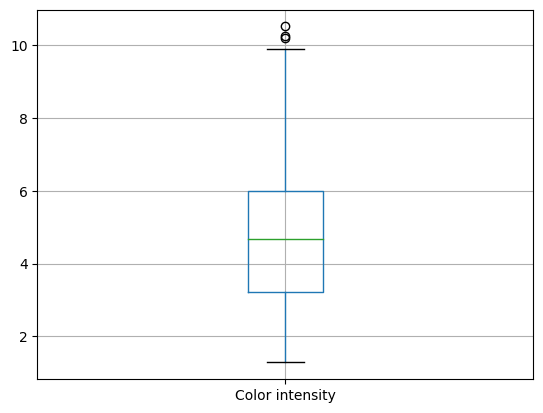

In [5]:
# boxplot = dfClean.boxplot(column='Malic acid')
# boxplot
outlierList = ['Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Proanthocyanins', 'Color intensity', 'Hue']

def delOutlier(col):
    q1 = dfClean[col].quantile(0.25)
    q3 = dfClean[col].quantile(0.75)
    iqr = q3 - q1

    # Filter outliers and replace them with the median
    # dfClean.loc[(dfClean[col] < q1 - 1.5 * iqr) | (dfClean[col] > q3 + 1.5 * iqr), col] = dfClean[col].median()
    dfClean[col] = dfClean[col].mask((dfClean[col] < q1 - 1.5 * iqr) | (dfClean[col] > q3 + 1.5 * iqr), df[col].median())

for col in outlierList:
    delOutlier(col)

# Now you can plot the boxplot after removing outliers
boxplot = dfClean.boxplot(column='Color intensity')
boxplot

**Split the variables**

X includes all columns except `Class label`, Y includes only `Class label`.

In [6]:
### START CODE HERE ###
X = dfClean.drop(columns = 'Class label')
Y = dfClean[['Class label']]
# print(f"X's columns: {X}")
# print(f"Y's columns: {Y}")
### END CODE HERE ###


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
X's columns: ['Alcalinity of ash', 'Alcohol', 'Ash', 'Color intensity', 'Flavanoids', 'Hue', 'Magnesium', 'Malic acid', 'Nonflavanoid phenols', 'OD280/OD315 of diluted wines', 'Proanthocyanins', 'Proline', 'Total phenols']
Y's column: ['Class label']
```

</details>

In [7]:
print("X's columns:",X.columns.tolist())
print("Y's column:",Y.columns.tolist())

X's columns: ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
Y's column: ['Class label']


**Data Transformation**

Standardize X Dataframe.
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- Scikitlearn's `preprocessing` migth be useful here.</br>
https://scikit-learn.org/stable/modules/preprocessing.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

|                  | Alcalinity of ash | Alcohol | Ash             | Color intensity | Flavanoids | Hue              | Magnesium | Malic acid | Nonflavanoid phenols | OD280/OD315 of diluted wines | Proanthocyanins | Proline | Total phenols |
|------------------|-------------------|---------|-----------------|------------------|------------|------------------|-----------|------------|----------------------|-----------------------------|-----------------|---------|---------------|
| count            | 178.0             | 178.0   | 178.0           | 178.0            | 178.0      | 178.0            | 178.0     | 178.0      | 178.0                | 178.0                       | 178.0           | 178.0   | 178.0         |
| mean             | 0.0               | 0.0     | 1.247442e-17    | 9.979533e-18     | 0.0        | 0.0              | 0.0       | 1.197544e-16 | 0.0                  | 0.0                         | 0.0             | 0.0     | 0.0           |
| std              | 1.002821          | 1.002821| 1.002821        | 1.002821         | 1.002821   | 1.002821         | 1.002821  | 1.002821   | 1.002821             | 1.002821                    | 1.002821        | 1.002821| 1.002821      |
| min              | -2.671018         | -2.434235| -3.679162       | -1.634288        | -1.695971  | -2.094732        | -2.088255 | -1.432983  | -1.868234            | -2.069034                   | -1.493188       | -2.107246| -2.671018     |
| 25%              | -0.689137         | -0.788245| -0.5721225      | -0.7951025       | -0.827539  | -0.767562        | -0.824415 | -0.6587486 | -0.7401408           | -0.597284                   | -0.784638       | -0.885468| -0.689137     |
| 50%              | 0.001518          | 0.061   | -0.02382132     | -0.1592246       | 0.10615    | 0.033127         | -0.122282 | -0.423112  | -0.1760947           | -0.0628977                  | -0.233720       | 0.09596 | 0.001518      |
| 75%              | 0.602088          | 0.836129| 0.6981085       | 0.493956         | 0.849085   | 0.713164         | 0.509638  | 0.6697929  | 0.6095407            | 0.629175                    | 0.7582486       | 0.808997| 0.602088      |
| max              | 3.154511          | 2.259772| 3.156325        | 3.435432         | 3.062832   | 3.301694         | 4.371372  | 3.109192   | 2.402403             | 1.960915                    | 3.485073        | 2.971473| 3.154511      |


</details>

In [15]:
### START CODE HERE ###
standardize_scaler = preprocessing.StandardScaler()
X_scaled = standardize_scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns = X.columns)
### END CODE HERE ###
X.describe()


,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.547641,0.273971,-1.254501,2.322386,0.808997,1.034819,-0.659563,1.344130,0.352805,0.392826,1.847920,1.013009
1,0.246290,-0.479490,-0.901621,-2.712903,0.111335,0.568648,0.733629,-0.820719,-0.540944,-0.250988,0.438116,1.113449,0.965242
2,0.196879,0.085189,1.246874,-0.260136,0.193225,0.808997,1.215533,-0.498407,2.314663,0.371973,0.347536,0.788587,1.395148
3,1.691550,-0.313981,0.557734,-0.856755,1.175915,2.491446,1.466525,-0.981875,1.138825,1.387878,-0.422392,1.184071,2.334574
4,0.295700,0.309113,2.057627,0.535356,1.585369,0.808997,0.663351,0.226796,0.466917,-0.279740,0.392826,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,-0.396735,0.355046,0.369628,-0.298119,-0.985614,-1.424900,1.274310,-0.951554,1.339958,-1.418769,-1.231206,-0.021952
174,0.493343,1.594244,0.476659,1.198265,0.275116,-0.793334,-1.284344,0.549108,-0.298311,1.148278,-1.147030,-1.485445,0.009893
175,0.332758,1.954470,-0.415169,0.203901,1.749151,-1.129824,-1.344582,0.549108,-0.410296,2.537959,-1.645218,-1.485445,0.280575
176,0.209232,0.309113,0.030745,0.203901,1.749151,-1.033684,-1.354622,1.354888,-0.204991,2.106679,-1.599928,-1.400699,0.296498


**Visualize Variable (scatter plot pairs of variables)**
<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `sns.pairplot()`
</details>
<br>


<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

</details>

In [26]:
### START CODE HERE ###
# dfCopy = sns.load_dataset(X)
sns.pairplot(dfClean, hue ='Class label', palette='Accent')
### END CODE HERE ###

Output hidden; open in https://colab.research.google.com to view.

## Principal Component Analysis (PCA)

**Calculate PCA of all varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]
Explained Variance (eigenvalues) : [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```
![image.png](attachment:image.png)


</details>


Explained Variance ratio: [0.37086336 0.20332931 0.0954301  0.0694187  0.06023354 0.04419032
 0.03910542 0.02895931 0.02478652 0.02137276 0.01903084 0.01554002
 0.00773979]
Explained Variance (eigenvalues) : [4.84846221 2.65821482 1.24760029 0.90754165 0.78745996 0.57771981
 0.5112426  0.37859801 0.32404525 0.27941568 0.24879869 0.20316165
 0.1011857 ]
--------------------------------------------
PCA components (eigenvectors) :
[[ 0.15843193 -0.22949146 -0.00900944 -0.28184217  0.12804436  0.39166918
   0.42149646 -0.28918228  0.31811799 -0.05327639  0.29483535  0.36947873
   0.29008829]
 [-0.4605688  -0.24730811 -0.31509024  0.03817107 -0.37576585 -0.03571682
   0.02510589 -0.03199428  0.00391039 -0.51258578  0.25254414  0.17726316
  -0.35197492]
 [-0.15281202  0.04325352  0.68696786  0.55094626  0.1771668   0.15251558
   0.11028367  0.14399895  0.10486423 -0.24140296  0.10878308  0.1509669
  -0.08869653]
 [-0.05291463  0.56164356 -0.17780202  0.14569654 -0.19119538  0.17761175
   0.1

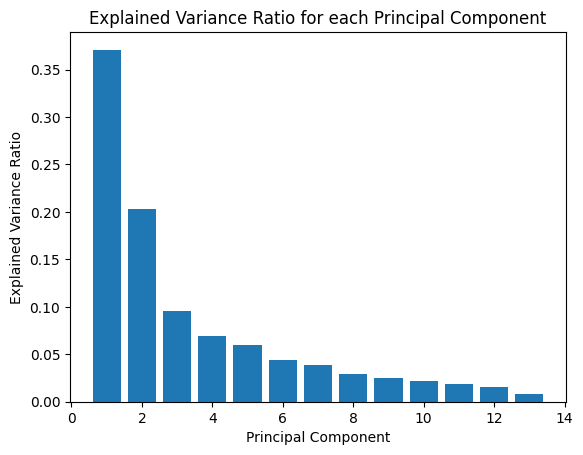

In [27]:
### START CODE HERE ###
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:',pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :',  pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

**Calculate PCA of 3 varaiables**

<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- `PCA()`
- This might be useful : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

```
Explained Variance ratio: [0.36198848 0.1920749 ]
Explained Variance (eigenvalues) : [4.73243698 2.51108093]
--------------------------------------------
PCA components (eigenvectors) :
[[-0.23932041  0.1443294  -0.00205106 -0.0886167   0.4229343   0.29671456
   0.14199204 -0.24518758 -0.2985331   0.37616741  0.31342949  0.28675223
   0.39466085]
 [ 0.0105905  -0.48365155 -0.31606881 -0.52999567  0.00335981  0.27923515
  -0.299634   -0.22493093 -0.02877949  0.16449619 -0.03930172 -0.36490283
  -0.06503951]]
```
![SegmentLocal](PCA_3_components.png "segment")

</details>


Explained Variance ratio: [0.37086336 0.20332931 0.0954301 ]
Explained Variance (eigenvalues) : [4.84846221 2.65821482 1.24760029]
--------------------------------------------
PCA components (eigenvectors) :
[[ 0.15843193 -0.22949146 -0.00900944 -0.28184217  0.12804436  0.39166918
   0.42149646 -0.28918228  0.31811799 -0.05327639  0.29483535  0.36947873
   0.29008829]
 [-0.4605688  -0.24730811 -0.31509024  0.03817107 -0.37576585 -0.03571682
   0.02510589 -0.03199428  0.00391039 -0.51258578  0.25254414  0.17726316
  -0.35197492]
 [-0.15281202  0.04325352  0.68696786  0.55094626  0.1771668   0.15251558
   0.11028367  0.14399895  0.10486423 -0.24140296  0.10878308  0.1509669
  -0.08869653]]


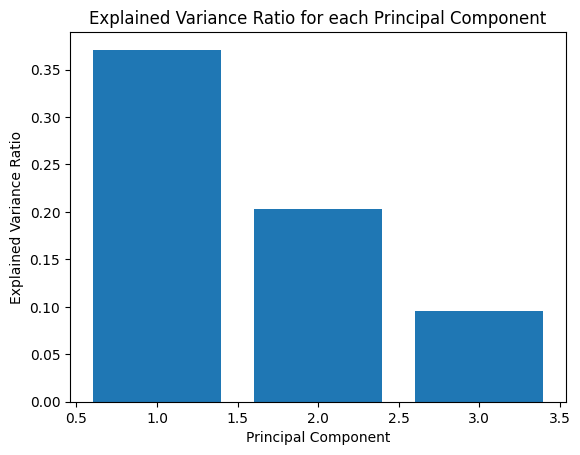

In [28]:
### START CODE HERE ###
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
print('Explained Variance ratio:',pca.explained_variance_ratio_)
print('Explained Variance (eigenvalues) :',  pca.explained_variance_)
print('--------------------------------------------')
print('PCA components (eigenvectors) :')
print(pca.components_)
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for each Principal Component')
plt.show()
### END CODE HERE ###

### **Train/Test Model**

**Train/Test Split**

Split the dataset into training and testing sets. Reserve frist 80% of data for training and last 20% for testing.

In [115]:
### START CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)
print(f'{len(X_train)},{len(X_test)}')
### END CODE HERE ###

142,36
142,36


Split training data into training (70%) and validation sets (30%).

In [116]:
### START CODE HERE ###
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 42)
print(f'{len(X_train)},{len(X_valid)}')
### END CODE HERE ###

99,43


**Initialize models**
- `LinearRegression()`

In [117]:
### START CODE HERE ###
model = LinearRegression(copy_X = True)
model_pca = LinearRegression(copy_X = True)

### END CODE HERE ###

### Model Training

Train LinearRegerssion() using
1. X original data

In [118]:
### START CODE HERE ###
model.fit(X_train,y_train) # เทรน Model
model.score(X_train,y_train)
### END CODE HERE ###

0.8949985172382835

2. X_PCA with n_components = n
- (Choose n at least 3 values from n_list = range(1,N)
- N = จำนวน input Feature (dimension of X)

In [137]:
### START CODE HERE ###
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_train)
model_pca.fit(X_pca,y_train) # เทรน Model
model_pca.score(X_pca,y_train)
### END CODE HERE ###

0.8172943793303347

**Model Performance Evaluation (MSE, R-square)**


<details>

<summary>
<font size="3" color="green">
<b>Hints</b>
</font>
</summary>

- mean_squared_error(), r2_score()

- Scikitlearn's `metrics` migth be useful here.</br>
https://scikit-learn.org/stable/modules/model_evaluation.html

</details>
<br>
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

</br>

| | n  | val_MSE  | test_MSE |  val_r2  | test_r2  |
|-|----|----------|----------|----------|----------|
|0| 0  | 0.051039 | 0.111825 | 0.914363 | 0.823047 |
|1| 1  | 0.106382 | 0.153570 | 0.821506 | 0.756988 |
|2| 2  | 0.106146 | 0.155484 | 0.821902 | 0.753960 |
|3| 3  | 0.113444 | 0.171154 | 0.809658 | 0.729162 |
|4| 4  | 0.113062 | 0.175151 | 0.810297 | 0.722838 |
|5| 5  | 0.096968 | 0.146228 | 0.837302 | 0.768607 |
|6| 7  | 0.072978 | 0.119330 | 0.877554 | 0.811170 |
|7| 10 | 0.057971 | 0.107307 | 0.902733 | 0.830195 |
|8| 13 | 0.051039 | 0.111825 | 0.914363 | 0.823047 |


</details>

1. Model Evaluation with Validation and Test Data

In [154]:
### START CODE HERE ###
# def compute_accuracy(Y_true, Y_pred):
#     correctly_predicted = 0
#     # iterating over every label and checking it with the true sample
#     for true_label, predicted in zip(Y_true, Y_pred):
#         if true_label == predicted:
#             correctly_predicted += 1
#     # computing the accuracy score
#     accuracy_score = correctly_predicted / len(Y_true)
#     return accuracy_score
y_valid_pred = model.predict(X_valid)
accuracy_valid = accuracy_score(y_valid.values.ravel().tolist(),np.round(y_valid_pred).ravel().tolist())
print("Accuracy valid (no PCA):", accuracy_valid)

y_test_pred = model.predict(X_test)
accuracy_test = accuracy_score(y_test.values.ravel().tolist(), np.round(y_test_pred).ravel().tolist())
print("Accuracy test (no PCA):", accuracy_test)

#pca model
X_pca = pca.fit_transform(X_valid)
y_valid_pred_pca = model_pca.predict(X_pca)
accuracy_valid = accuracy_score(y_valid.values.ravel().tolist(),np.round(y_valid_pred_pca).ravel().tolist())
print("Accuracy valid (with PCA):", accuracy_valid)


X_pca = pca.fit_transform(X_test)
y_test_pred_pca = model_pca.predict(X_pca)
accuracy_test = accuracy_score(y_test.values.ravel().tolist(), np.round(y_test_pred_pca).ravel().tolist())
print("Accuracy test (with PCA):", accuracy_test)
### END CODE HERE ###

Accuracy valid (no PCA): 0.9069767441860465
Accuracy test (no PCA): 0.9444444444444444
Accuracy valid (with PCA): 0.813953488372093
Accuracy test (with PCA): 0.8055555555555556


2. Calculate Model Performance Metrics (MSE, R-square) of Validation and Test Data

In [155]:
### START CODE HERE ###
print('mean_squared_error validation (no pca) :',mean_squared_error(y_valid,y_valid_pred))
print('mean_squared_error Test Data (no pca) :',mean_squared_error(y_test,y_test_pred))

print('r2_score Test Data (no pca) :',r2_score(y_valid,y_valid_pred))
print('r2_score Test Data (no pca) :',r2_score(y_test,y_test_pred))

print('mean_squared_error validation (with pca) :',mean_squared_error(y_valid,y_valid_pred_pca))
print('mean_squared_error Test Data (with pca) :',mean_squared_error(y_test,y_test_pred_pca))

print('r2_score Test Data (with pca) :',r2_score(y_valid,y_valid_pred_pca))
print('r2_score Test Data (with pca) :',r2_score(y_test,y_test_pred_pca))
### END CODE HERE ###

mean_squared_error validation (no pca) : 0.09048149475049581
mean_squared_error Test Data (no pca) : 0.06753199526868238
r2_score Test Data (no pca) : 0.8498202120344105
r2_score Test Data (no pca) : 0.8842308652536873
mean_squared_error validation (with pca) : 0.14468912966701858
mean_squared_error Test Data (with pca) : 0.14171742031346374
r2_score Test Data (with pca) : 0.7598472165580634
r2_score Test Data (with pca) : 0.757055850891205


## Bar Graph for MSE, R-Square Comparison
<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

![image.png](attachment:image.png)

</br>

In [ ]:
### START CODE HERE ###
plt.figure(figsize = (10, 5))
plt.subplot(2,2,1), plt.bar()
plt.title('Validation MSE')
plt.ylabel('MSE')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.subplot(2,2,2), plt.bar()
plt.title('Validation R-Square')
plt.ylabel('R-Square')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.subplot(2,2,3), plt.bar()
plt.title('Validation R-Square')
plt.ylabel('R-Square')
plt.xlabel('Principal Component (n=0: no PCA)')

plt.show()
### END CODE HERE ###

## Question
1. What is the optimal value of n that
- ensures the Mean Squared Error (MSE) difference by no more than 0.01 from the MSE of the original data?

2. When taking into account R-square, what optimum value of n
- results in an R-square difference not exceeding 0.1 from the R-square of the original data?

3. Determine the dimension reduction ratio (m / N), where:
- m is the minimum of the optimum values of n obtained from questions 2 and 3.
- N represents the number of input features (dimension of X).

In [ ]:
# Ans